# Playing with the dimensionality of clusters

Thanks to Jack Benedetto for the initial script

In [1]:
import numpy as np
import scipy.stats as scs
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def histpair(x, y, bins=None, xmin=None, xmax=None, normed=1, alpha=0.2, figsize=(12,8), title=None, binsize=None):
    '''
    INPUT:
    x: numpy array; point of a distribution
    y: numpy array of the same length; will plot histogram for each unique value of y
    bins: int; number of bins in histogram
    xmin: lower limit; other 
    '''
    plt.figure(figsize=figsize)
    plt.title(title)
    if xmin is None and xmax is None:
        xc = x
    else:
        xc = np.clip(x,a_min=xmin,a_max=xmax)
        
    if binsize == None:
        if bins == None:
            bins = 20.
        # maybe there should be logic around trying to make these integers
        # I might need a +1 here
        binarray = np.arange(xc.min(), xc.max(), (xc.max() - xc.min())/bins)
    else:
        binarray = np.arange(xc.min(), xc.max(), binsize)
        
    for yval in np.unique(y):
            plt.hist(list(xc[y==yval]), alpha=alpha, bins=binarray, normed=normed, label=str(yval))
            plt.xlabel("pair distance")
            plt.ylabel("frequency")
    plt.xlim(xmin=xmin, xmax=xmax)
    plt.legend()
    #plt.show()

### Generate 2 (perfect) clusters in 2 dimensions

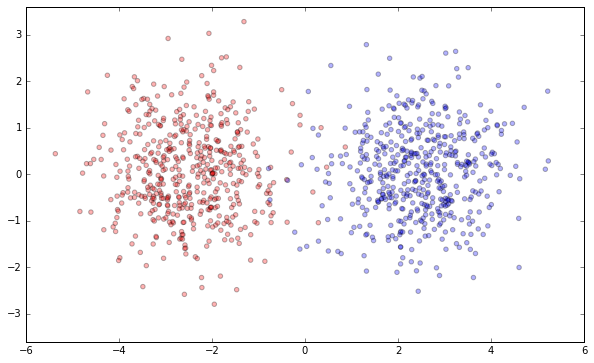

In [3]:
# the number of samples generated for each cluster (2 clusters)
samplecount = 500

# the distance between clusters centroids
separation = 5.

# the scale of both cluster (var)
clusterscale = 1


#allocate a numpy array, 2 columns, samplecount*2 rows
X = np.zeros((2, 2*samplecount))

# use normal distribution for generating the two columns
# on axis 0, create two separated clusters based on clusterscale and separation
X[0,:] = np.concatenate((scs.norm(-separation/2., clusterscale).rvs(samplecount),\
                         (scs.norm(separation/2., clusterscale).rvs(samplecount))))

# on axis 1, create normal distribution based on clusterscale
X[1, :] = scs.norm(0, clusterscale).rvs(2*samplecount)

# assign cluster colors
clustercolors = ["r"] * samplecount + ["b"] * samplecount 

# scatter plot that
plt.figure(figsize=(10,6))
plt.axis('equal')
plt.scatter(X[0, :], X[1, :], c=clustercolors, alpha=0.3)
plt.show()

### Generate 2 clusters on 1D and add noise in remaining dimensions

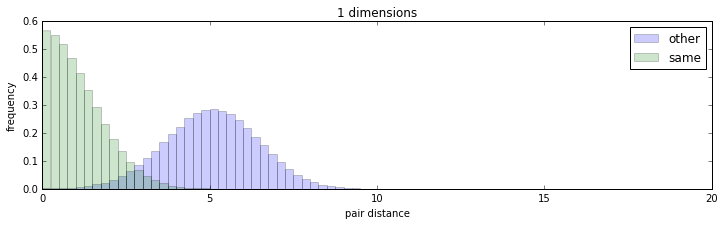

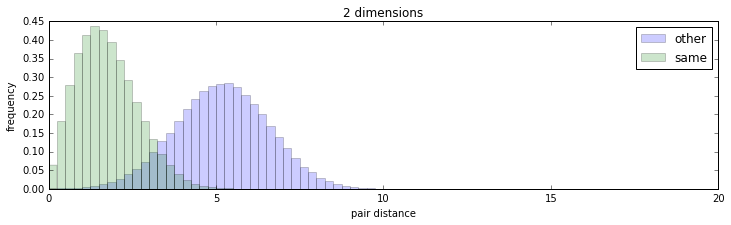

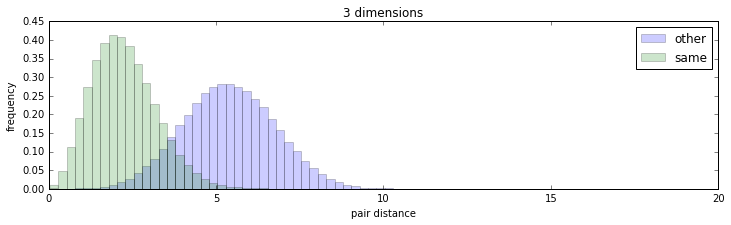

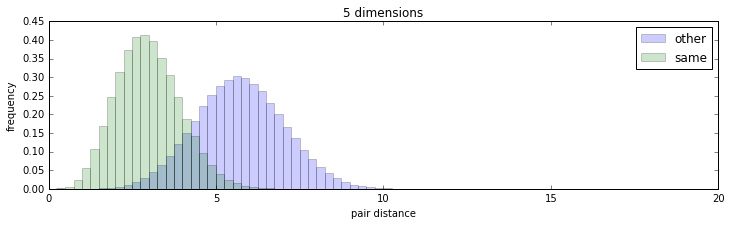

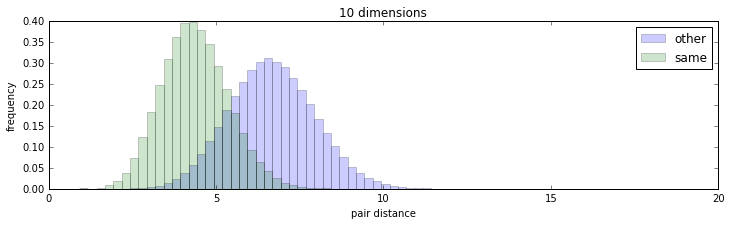

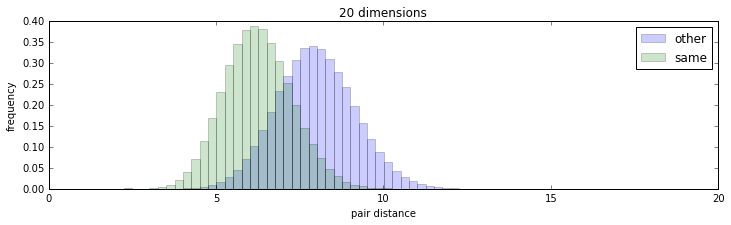

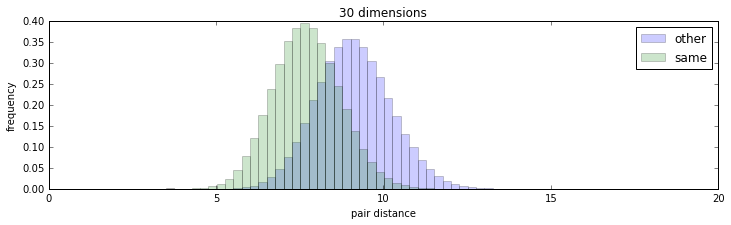

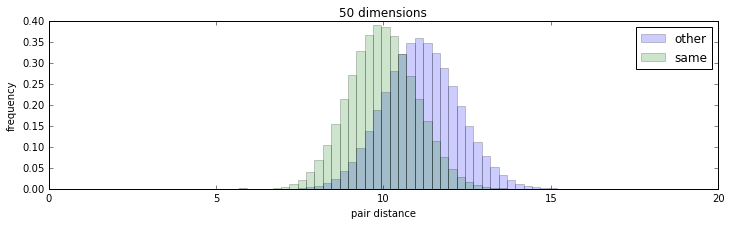

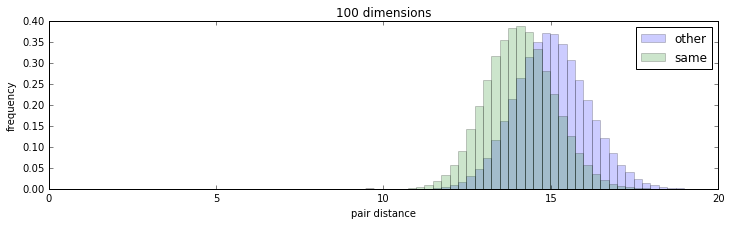

In [4]:
# the number of samples generated for each cluster (2 clusters)
samplecount = 500

# the distance between clusters centroids
separation = 5.

# the scale of both cluster (var)
clusterscale = 1

# do that as long as possible...
for dims in [1, 2, 3, 5, 10, 20, 30, 50, 100]:
    # allocate a numpy array, 2 columns, samplecount*2 rows
    X = np.zeros((dims, 2*samplecount))

    # on axis 0, create two separated clusters based on clusterscale and separation
    X[0,:] = np.concatenate((scs.norm(-separation/2., clusterscale).rvs(samplecount),\
                         (scs.norm(separation/2., clusterscale).rvs(samplecount))))

    # fill the rest of the columns with 0 centered normal values
    for d in range(1, dims):
        X[d, :] = scs.norm(0, clusterscale).rvs(2*samplecount)

    # assign cluster labels
    clusterlabels = ["cluster 1"] * samplecount + ["cluster 2"] * samplecount 
    
    # compute pair distances
    y = []      # to hold identity of clusters
    dist = []   # to hold distances
    for i in range(2*samplecount):
        for j in range(i+1, 2*samplecount):
            # compute distance between each pair of rows
            d = np.sqrt(sum((X[:,i] - X[:, j])**2))
            dist.append(d)
            # label each distance as 'same' or 'other' depending on cluster identity
            y.append("same" if i // samplecount == j // samplecount else "other")
    
    # plot the histogram
    histpair(np.array(dist), np.array(y), binsize=0.25, figsize=(12,3),
                   xmin=0, xmax=20, title="{0} dimensions".format(dims))
    #plt.axes(frameon=False)

    plt.show()

### Generate two clusters with clear separations also in the remaining dimensions

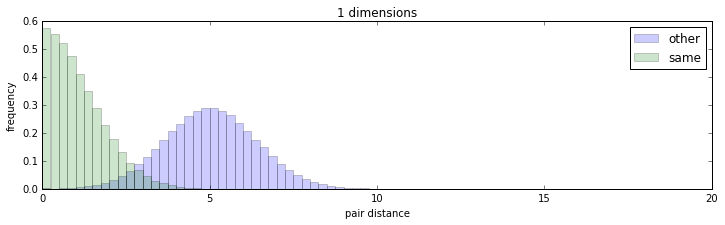

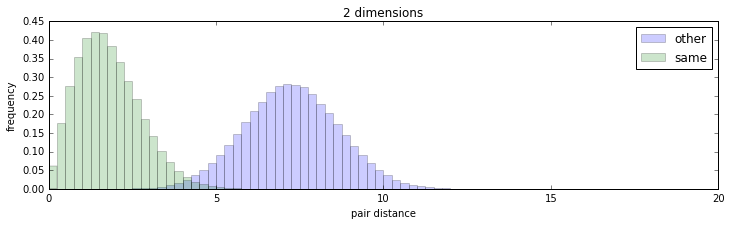

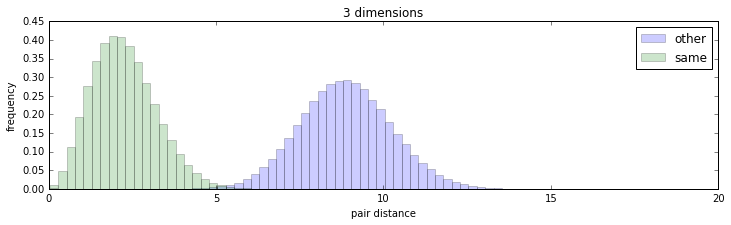

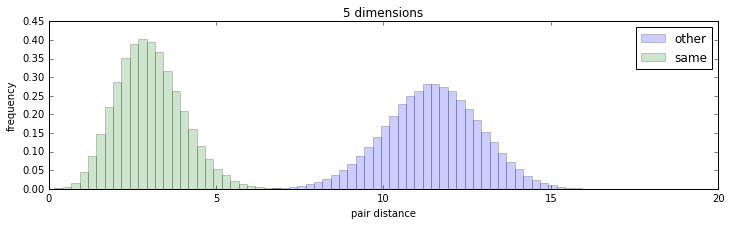

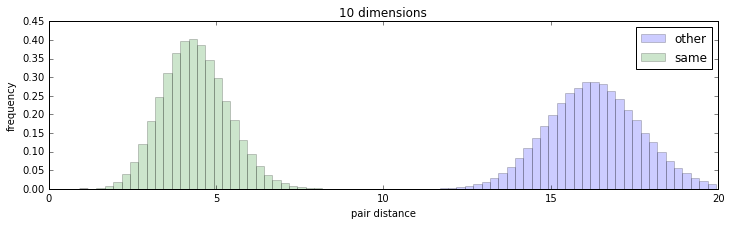

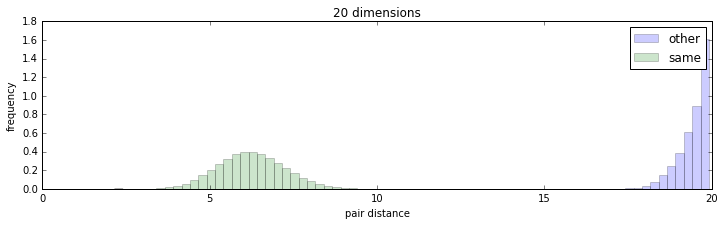

/Users/jf.omhover/anaconda/envs/py27/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6016: RuntimeWarning: invalid value encountered in true_divide
  m = (m.astype(float) / db) / m.sum()


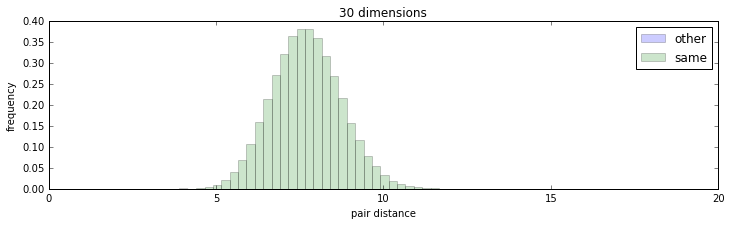

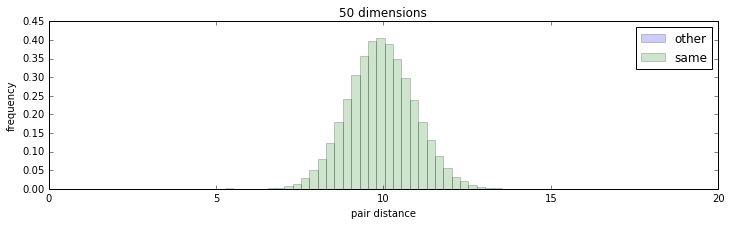

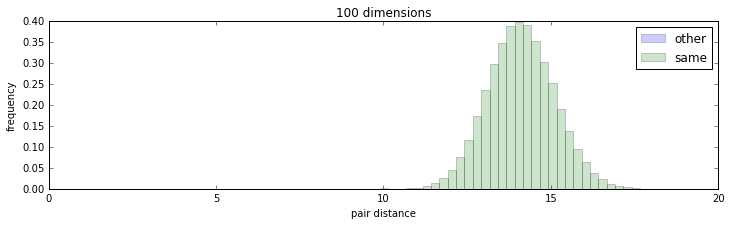

In [5]:
# the number of samples generated for each cluster (2 clusters)
samplecount = 500

# the distance between clusters centroids
separation = 5.

# the scale of both cluster (var)
clusterscale = 1

# do that as long as possible...
for dims in [1, 2, 3, 5, 10, 20, 30, 50, 100]:
    # allocate a numpy array, 2 columns, samplecount*2 rows
    X = np.zeros((dims, 2*samplecount))

    # on axis d, create two separated clusters based on clusterscale and separation

    # fill the rest of the columns with normal values (like axis 1)
    for d in range(0, dims):
        X[d,:] = np.concatenate((scs.norm(-separation/2., clusterscale).rvs(samplecount),\
                         (scs.norm(separation/2., clusterscale).rvs(samplecount))))

    # assign cluster labels
    clusterlabels = ["cluster 1"] * samplecount + ["cluster 2"] * samplecount 
    
    # compute pair distances
    y = []      # to hold identity of clusters
    dist = []   # to hold distances
    for i in range(2*samplecount):
        for j in range(i+1, 2*samplecount):
            # compute distance between each pair of rows
            d = np.sqrt(sum((X[:,i] - X[:, j])**2))
            dist.append(d)
            # label each distance as 'same' or 'other' depending on cluster identity
            y.append("same" if i // samplecount == j // samplecount else "other")
    
    # plot the histogram
    histpair(np.array(dist), np.array(y), binsize=0.25, figsize=(12,3),
                   xmin=0, xmax=20, title="{0} dimensions".format(dims))
    #plt.axes(frameon=False)

    plt.show()

### Now make the separation less and less clear along dimensions

Each new dimensions contributed to the separation with a decreasing factor (exponential)

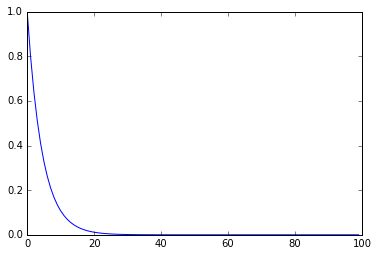

In [6]:
factor = 0.8
plt.plot([factor**d for d in xrange(0,100)])
plt.show()

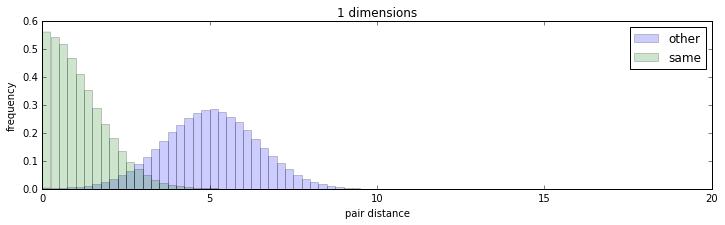

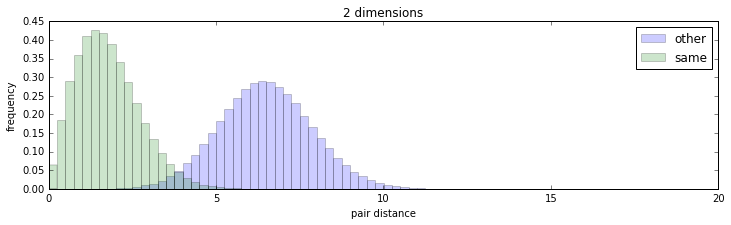

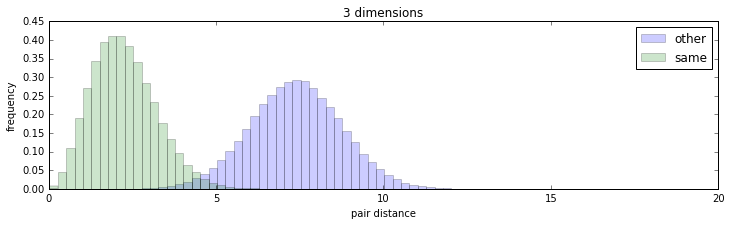

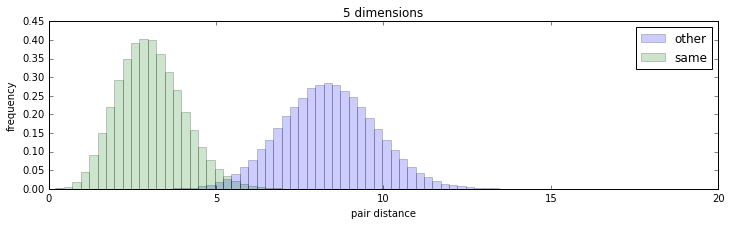

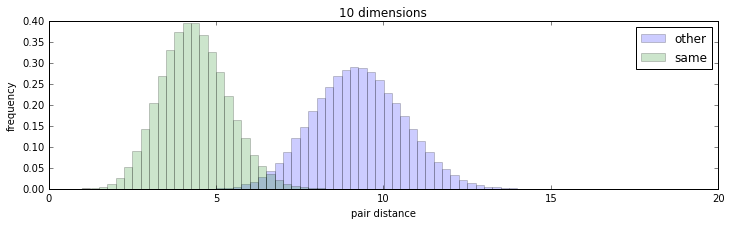

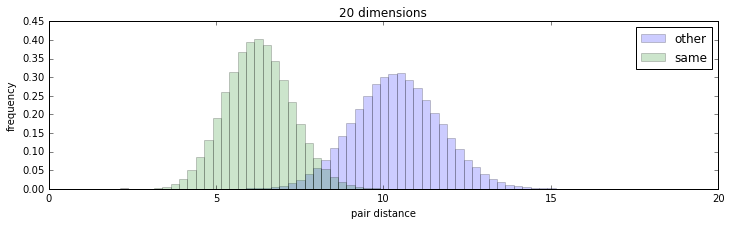

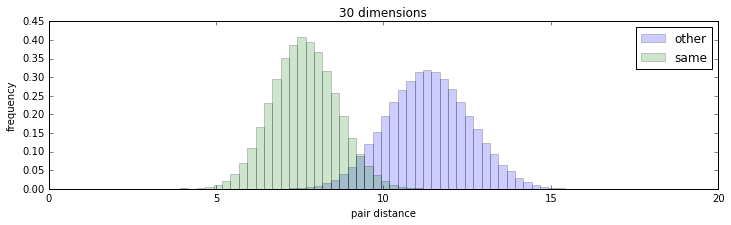

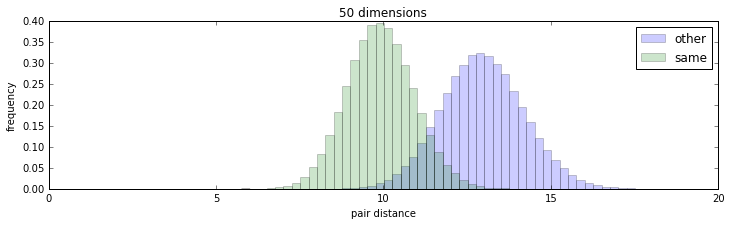

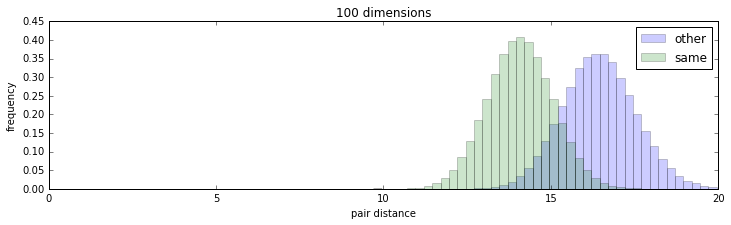

In [7]:
# the number of samples generated for each cluster (2 clusters)
samplecount = 500

# the distance between clusters centroids
separation = 5.

# the scale of both cluster (var)
clusterscale = 1

# lambda factor
factor = 0.8

# do that as long as possible...
for dims in [1, 2, 3, 5, 10, 20, 30, 50, 100]:
    # allocate a numpy array, 2 columns, samplecount*2 rows
    X = np.zeros((dims, 2*samplecount))

    # on axis d, create two separated clusters based on clusterscale and separation

    # fill the rest of the columns with normal values (like axis 1)
    for d in range(0, dims):
        X[d,:] = np.concatenate((scs.norm( (-separation/2.)*(factor**d), clusterscale).rvs(samplecount),\
                         (scs.norm( (separation/2.)*(factor**d), clusterscale).rvs(samplecount))))

    # assign cluster labels
    clusterlabels = ["cluster 1"] * samplecount + ["cluster 2"] * samplecount 
    
    # compute pair distances
    y = []      # to hold identity of clusters
    dist = []   # to hold distances
    for i in range(2*samplecount):
        for j in range(i+1, 2*samplecount):
            # compute distance between each pair of rows
            d = np.sqrt(sum((X[:,i] - X[:, j])**2))
            dist.append(d)
            # label each distance as 'same' or 'other' depending on cluster identity
            y.append("same" if i // samplecount == j // samplecount else "other")
    
    # plot the histogram
    histpair(np.array(dist), np.array(y), binsize=0.25, figsize=(12,3),
                   xmin=0, xmax=20, title="{0} dimensions".format(dims))
    #plt.axes(frameon=False)

    plt.show()